In [2]:
import sys
import subprocess
import cdsapi
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

import errno
import zarr
from dask.diagnostics import ProgressBar
import scipy
import netCDF4
from dask.distributed import progress

In [3]:
from dask.distributed import Client

client = Client('tcp://127.0.0.1:35461')
client

Client Scheduler: tcp://127.0.0.1:35461 Dashboard: http://127.0.0.1:49333/status,Cluster Workers: 56 Cores: 56 Memory: 270.36 GB


In [4]:
basedir = '/mnt/DataDrive2/data/mjolly/era5-land'
zone = "SAR"
y = 2018
m = 1
mychunk = {'latitude':20,'longitude':20,'time': -1}
ifile = '%s/era5-land-%s-0m_u_component_of_wind-%s-%02d.nc' % (basedir,zone,y,m)
zone_uwind = xr.open_dataset(ifile,chunks=mychunk,engine='netcdf4')
ofile = '%s/era5-land-%s-0m_u_component_of_wind-%s-%02d.zarr' % (basedir,zone,y,m)
zone_uwind.to_zarr(ofile)

In [5]:
zarrtest = xr.open_dataset(ofile,engine='zarr')

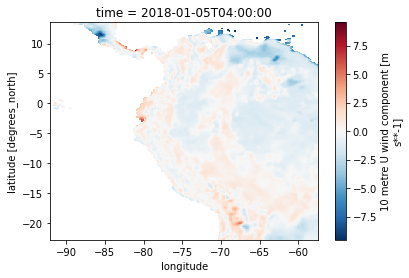

In [9]:
zarrtest.u10[100].plot()

In [11]:
# Load the country boundaries file
countries_path = r"./data"
countries_path = os.path.join(countries_path, "ne_10m_admin_0_countries_lakes.shp")
states_path = r"./data"
states_path = os.path.join(states_path, "ne_10m_admin_1_states_provinces_lakes.shp")

# Load the state boundaries file and filter for CONUS
states_gdf = gpd.read_file(states_path)
#states_gdf = states_gdf[states_gdf.iso_a2 == "PE" or states_gdf.iso_a2 == "CO"]
#states_gdf = states_gdf[states_gdf.name != "Alaska" ]
#states_gdf = states_gdf[states_gdf.name != "Hawaii"]
states_gdf.head()

#states_gdf = states_gdf[states]
countries_gdf = gpd.read_file(countries_path)
#countries_gdf.head()
SARBnd = states_gdf[states_gdf['iso_a2'].isin(['PE','CO','EC','BO'])]

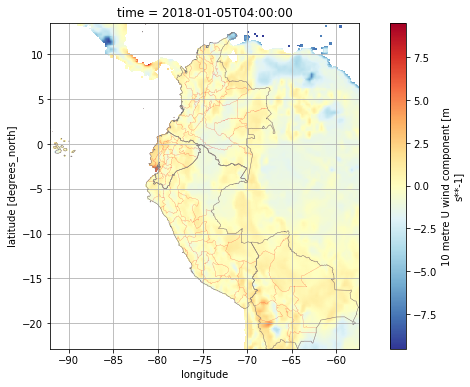

In [15]:
SARCountries = SARBnd.dissolve(by='iso_a2')
f, ax = plt.subplots(figsize=(11, 6))
zarrtest.u10[100].plot(cmap="RdYlBu_r",ax=ax)
SARCountries.plot(color='None',edgecolor='grey',linewidth=0.5,ax=ax,zorder=4)
SARBnd.plot(color='None',edgecolor='red',linewidth=0.2,linestyle=':',ax=ax)
#ax.set(title="Raster Layer with Vector Overlay")
#ax.axis('off')
plt.grid()
plt.show()